In [ ]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os
import random
import cv2
import pickle

In [ ]:
import os
os.chdir('/content/drive/My Drive/TAX/COVID_19_CT_Data')
print(os.getcwd())

/content/drive/My Drive/TAX/COVID_19_CT_Data


(100, 100)

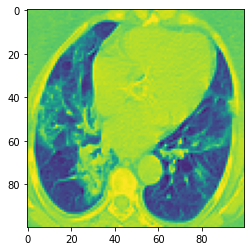

In [ ]:
img = cv2.imread("/content/drive/MyDrive/TAX/COVID_19_CT_Data/Train/COVID/Covid (1002).png",cv2.IMREAD_GRAYSCALE)
plt.imshow(img)
img.shape

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import os
import random
import cv2
import pickle


datapath='/content/drive/My Drive/TAX/COVID_19_CT_Data/Train'
categories=['COVID','non-COVID']

training_data=[]

def create_training_data():
    with tf.device('/device:GPU:0'):
        for cat in categories:
            path=os.path.join(datapath,cat)
            class_num=categories.index(cat)
            for img in os.listdir(path):
                try:
                    img_array=cv2.imread(os.path.join(path,img),cv2.IMREAD_GRAYSCALE)
                    new=cv2.resize(img_array,(100,100))
                    training_data.append([new,class_num])
                except Exception as e:
                    pass

create_training_data()

random.shuffle(training_data)

X=[]
y=[]


for features,label in training_data:
    X.append(features)
    y.append(label)


X=np.array(X).reshape(-1,100,100,1)

#Storing the Prepare data with the help of Packle

pickle_out=open("Xtrain.pickle","wb") 
pickle.dump(X,pickle_out)
pickle_out.close()

pickle_out=open("ytrain.pickle","wb")
pickle.dump(y,pickle_out)
pickle_out.close()


In [ ]:


import tensorflow as tf
import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Activation,Flatten, Conv2D, MaxPool2D, Dropout
import pickle
from keras.utils.np_utils import to_categorical

x_train=pickle.load(open("Xtrain.pickle","rb"))
y_train=pickle.load(open("ytrain.pickle","rb"))

x_train=x_train/255.0

y_train=to_categorical(y_train)

In [ ]:
model=Sequential()
model.add(Conv2D(filters=128, kernel_size=(3, 3), activation='relu', input_shape=X.shape[1:]))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(units=128, activation='relu'))
model.add(Dropout(rate=0.5))
model.add(Dense(units=2, activation='sigmoid'))

opt = keras.optimizers.Adam(learning_rate=0.001)
model.compile(loss="categorical_crossentropy",optimizer=opt, metrics=['accuracy'])

model.summary()
history=model.fit(x_train,y_train,batch_size=32,epochs=20,validation_split=0.1)


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 98, 98, 128)       1280      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 49, 49, 128)       0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 47, 47, 64)        73792     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 23, 23, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 33856)             0         
_________________________________________________________________
dense (Dense)                (None, 128)               4333696   
_________________________________________________________________
dropout (Dropout)            (None, 128)              

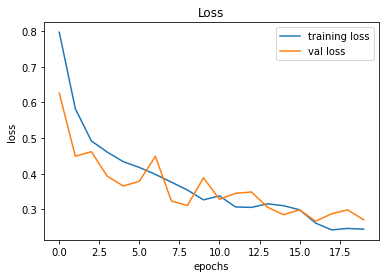

In [ ]:
#Loss plot 
plt.plot(history.history['loss'], label='training loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.title('Loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

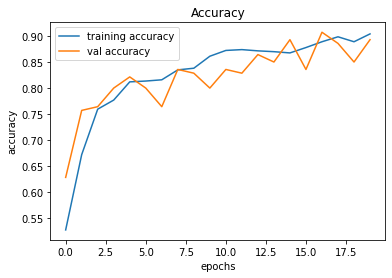

In [ ]:
#accuracy  plot
plt.figure(0)
plt.plot(history.history['accuracy'], label='training accuracy')
plt.plot(history.history['val_accuracy'], label='val accuracy')
plt.title('Accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import os
import random
import cv2
import pickle


datapath='/content/drive/My Drive/TAX/COVID_19_CT_Data/Test'
categories=['COVID','non-COVID']

test_data=[]

def create_test_data():
    for cat in categories:
        path=os.path.join(datapath,cat)
        class_num=categories.index(cat)
        for img in os.listdir(path):
            try:
                img_array=cv2.imread(os.path.join(path,img),cv2.IMREAD_GRAYSCALE)
                new=cv2.resize(img_array,(100,100))
                test_data.append([new,class_num])
            except Exception as e:
                pass

create_test_data()

random.shuffle(test_data)

Xtest=[]
ytest=[]


for features,label in test_data:
    Xtest.append(features)
    ytest.append(label)

Xtest=np.array(Xtest).reshape(-1,100,100,1)
Xtest=Xtest/255.0
ytest=to_categorical(ytest)
model.evaluate(Xtest,ytest)

19/19 [==============================] - 1s 29ms/step - loss: 1.1536 - accuracy: 0.6365


[1.1535682678222656, 0.6365187764167786]

In [ ]:
from sklearn.metrics import confusion_matrix
ypred=model.predict_classes(Xtest)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


In [ ]:
#Coverting the ytest data
y_test=[]
for i in ytest:
  count=0;
  for j in i:
    if(j==1.0):
      y_test.append(count)
    count=count+1
    #count++
#Coverting the ytest data
y_pred=[]
for i in ypred:
  y_pred.append(i)
print(y_test)
print(y_pred)

[1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 

In [ ]:
#accuracy with the test data
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test, y_pred))

0.636518771331058


In [ ]:
# for the confusion metrix and classification report
from sklearn import metrics

# Print the confusion matrix
cm=metrics.confusion_matrix(y_test, y_pred)
print(cm)


[[146 156]
 [ 57 227]]


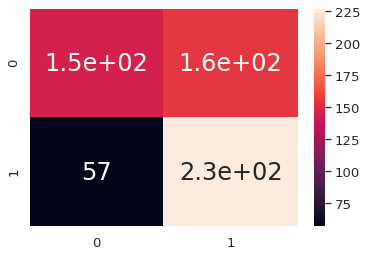

In [ ]:
import seaborn as sn
import pandas as pd
import matplotlib.pyplot as plt
sn.set(font_scale=1.2) # for label size
sn.heatmap(cm, annot=True, annot_kws={"size": 24}) # font size
plt.show()
#categories=['COVID','non-COVID']
#          =[ 0     , 1         ]

In [ ]:
# Print the precision and recall, among other metrics
print(metrics.classification_report(y_test, y_pred, digits=3))

              precision    recall  f1-score   support

           0      0.719     0.483     0.578       302
           1      0.593     0.799     0.681       284

    accuracy                          0.637       586
   macro avg      0.656     0.641     0.629       586
weighted avg      0.658     0.637     0.628       586



In [ ]:
import sklearn
sklearn.metrics.precision_score(y_test, y_pred)

0.5926892950391645

In [ ]:
sklearn.metrics.recall_score(y_test, y_pred)

0.7992957746478874

In [ ]:
sklearn.metrics.f1_score(y_test, y_pred)

0.6806596701649176

In [ ]:
sklearn.metrics.accuracy_score(y_test, y_pred)

0.636518771331058

In [ ]:
import cv2
import numpy as np

def prepare(path):
  img=cv2.resize(cv2.imread(path,cv2.IMREAD_GRAYSCALE),(100,100))
  return img.reshape(-1,100,100,1)

categories=['COVID','non-COVID']
model=tf.keras.models.load_model("CovidDetector")
prediction=model.predict([prepare("/content/drive/My Drive/TAX/COVID_19_CT_Data/Test/COVID/Covid (4).png")])
print(categories[np.argmax(prediction)])
prediction

COVID


array([[1., 0.]], dtype=float32)